In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, 'C:/Users/provo501/Documents/GitHub/batch-bandits')

from CMAB.replay_env import ReplayEnvironment
from CMAB.LinUCB import LinUCBAgent
from CMAB.LinTS import LinTSAgent
from CMAB.offline_evaluator import OfflineEvaluator
from CMAB.rl_glue import RLGlue
from basics.random_agent import RandomAgent
from utilities.dataloader import BanditDataset

In [2]:
data_dir = 'C:/Users/provo501/Documents/GitHub/batch-bandits/experiments/data/mushroom_data_final.pickle'
env_info = {'pickle_file': data_dir,
            'seed': 1}

In [3]:
# init env
environment = ReplayEnvironment

# init random agent
random_agent_info = {'num_actions': 2}
ra = RandomAgent()
ra.agent_init(random_agent_info)

In [4]:
# learn LinUCB agent
agent_info = {'alpha': 2,
              'num_actions': 2,
              'seed': 1,
              'batch_size': 1}
agent = LinUCBAgent
rl_glue = RLGlue(environment, agent)
for i in range(4):    
    rl_glue.rl_init(agent_info, env_info)
    rl_glue.rl_episode(0)
UCB_agent = rl_glue.agent

In [5]:
# learn LinTS agent
agent_info = {'num_actions': 2,
              'replay_buffer_size': 200,
              'seed': 1,
              'batch_size': 1}
agent = LinTSAgent
rl_glue = RLGlue(environment, agent)
for i in range(4):    
    rl_glue.rl_init(agent_info, env_info)
    rl_glue.rl_episode(0)
TS_agent = rl_glue.agent

In [6]:
result = []
result1 = []
result2 = []

exper_seeds = [2, 5, 10, 12, 54, 32, 15, 76, 45, 56]
for seed_ in exper_seeds:
    dataset = BanditDataset(pickle_file=data_dir, seed=seed_)

    eval_info = {'dataset': dataset, 'agent': UCB_agent}
    eval_info1 = {'dataset': dataset, 'agent': TS_agent}
    eval_info2 = {'dataset': dataset, 'agent': ra}

    evaluator = OfflineEvaluator(eval_info)
    evaluator1 = OfflineEvaluator(eval_info1)
    evaluator2 = OfflineEvaluator(eval_info2)

    reward = evaluator.eval_run()
    reward1 = evaluator1.eval_run()
    reward2 = evaluator2.eval_run()

    result.append(reward)
    result1.append(reward1)
    result2.append(reward2)

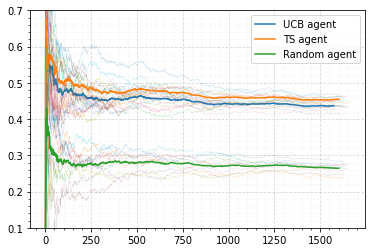

In [7]:
labels = ['UCB agent', 'TS agent', 'Random agent']
for i, res in enumerate([result, result1, result2]):
    for elem in res:
        plt.plot(elem, linewidth=0.1)
    avg = [float(sum(col))/len(col) for col in zip(*res)]
    plt.plot(avg, label=labels[i])
plt.legend()
plt.ylim([0.1, 0.7])
plt.grid(b=True, which='major', linestyle='--', alpha=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', linestyle=':', alpha=0.2)
plt.show()